## Kaggle S5E5 Predict Calories

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

test_data.head

<bound method NDFrame.head of             id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       750000    male   45   177.0    81.0       7.0        87.0       39.8
1       750001    male   26   200.0    97.0      20.0       101.0       40.5
2       750002  female   29   188.0    85.0      16.0       102.0       40.4
3       750003  female   39   172.0    73.0      20.0       107.0       40.6
4       750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...     ...  ...     ...     ...       ...         ...        ...
249995  999995  female   56   159.0    62.0       6.0        85.0       39.4
249996  999996    male   32   202.0   101.0       3.0        84.0       38.4
249997  999997  female   31   164.0    64.0      14.0        98.0       40.1
249998  999998  female   62   158.0    61.0      25.0       106.0       40.7
249999  999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 8 columns]>

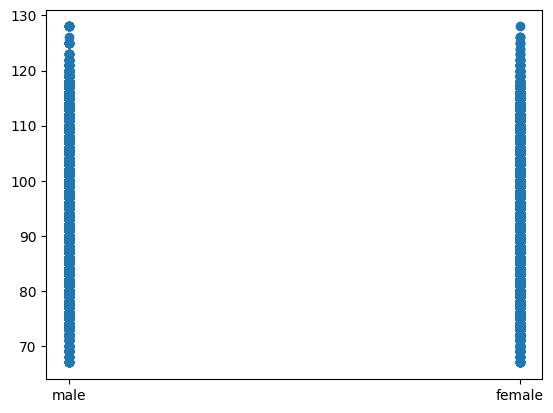

In [6]:
plt.scatter(test_data.Sex, test_data.Heart_Rate)
plt.show()